<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-07-10 23:08:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  57.1MB/s    in 2.7s    

2025-07-10 23:08:19 (57.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



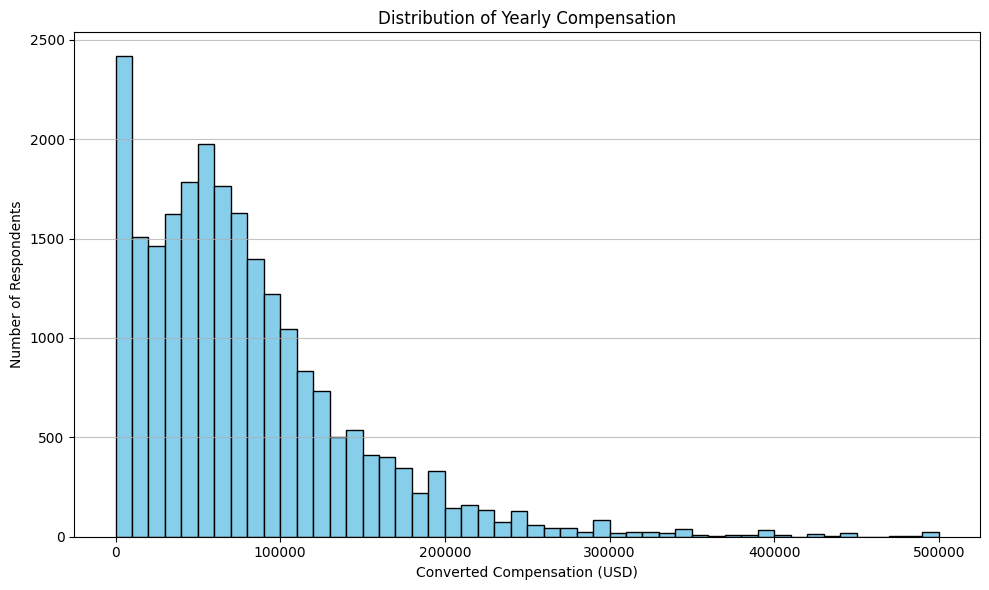

In [4]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Drop missing or non-numeric compensation entries
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df.dropna(subset=['ConvertedCompYearly'])

# Filter extreme values for better visibility (e.g., remove salaries above $500,000)
df_filtered = df[df['ConvertedCompYearly'] <= 500000]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['ConvertedCompYearly'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



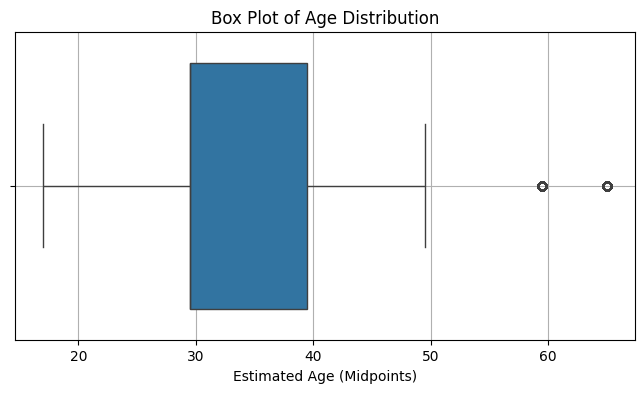

In [5]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Map age ranges to numeric midpoints
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 65,
}

# Convert age ranges to numeric midpoints
df['AgeNumeric'] = df['Age'].map(age_map)

# Drop rows where age couldn't be mapped
df_clean = df.dropna(subset=['AgeNumeric'])

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_clean['AgeNumeric'])
plt.title('Box Plot of Age Distribution')
plt.xlabel('Estimated Age (Midpoints)')
plt.grid(True)
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



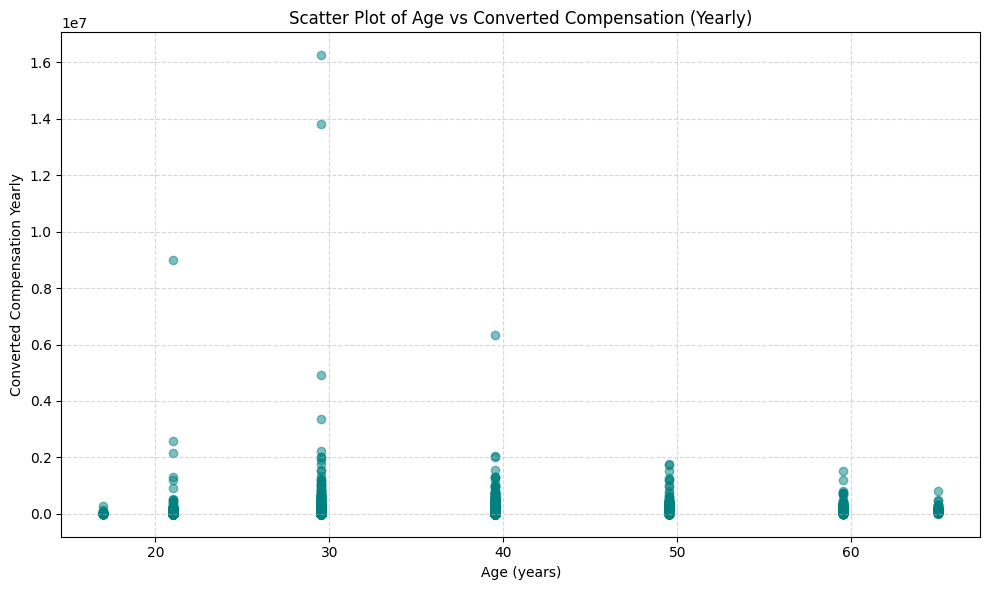

In [6]:
## Write your code here

import matplotlib.pyplot as plt

# Map age ranges to numeric midpoints 
df['Age_numeric'] = df['Age'].map(age_map)

# Convert compensation to numeric (handle errors)
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Drop rows where Age_numeric or ConvertedCompYearly are missing
df_clean = df.dropna(subset=['Age_numeric', 'ConvertedCompYearly'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Age_numeric'], df_clean['ConvertedCompYearly'], alpha=0.5, color='teal')
plt.title('Scatter Plot of Age vs Converted Compensation (Yearly)')
plt.xlabel('Age (years)')
plt.ylabel('Converted Compensation Yearly')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


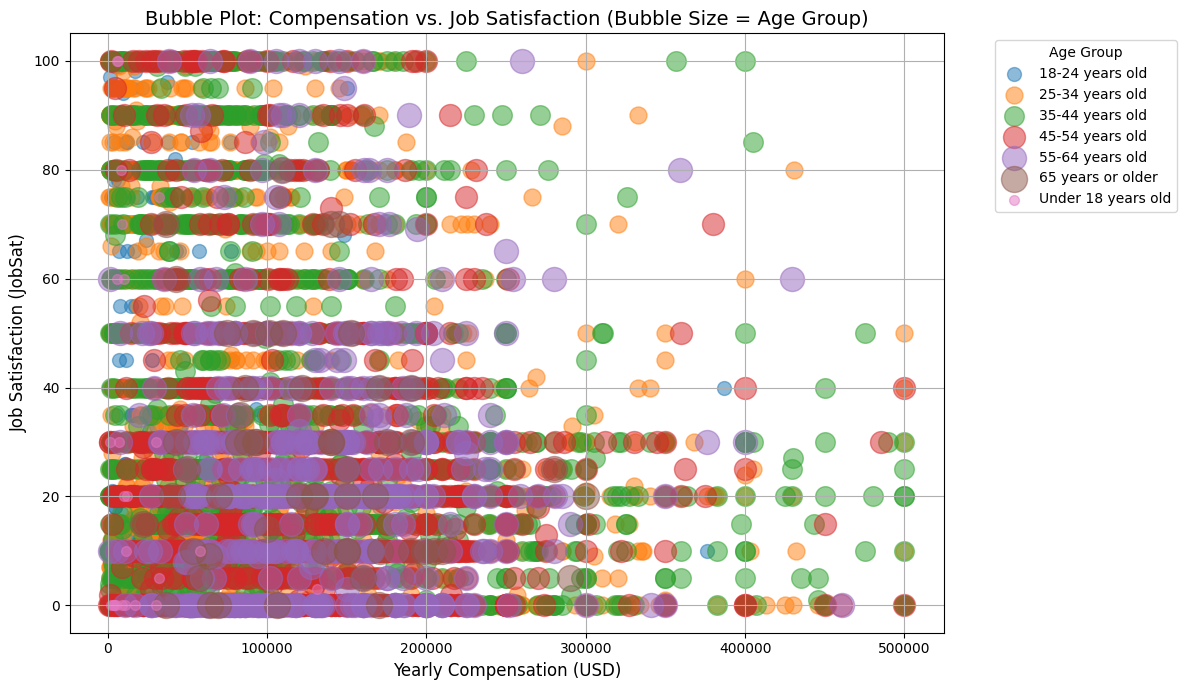

In [7]:
## Write your code here

import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define bubble sizes per age range
bubble_size_map = {
    "Under 18 years old": 50,
    "18-24 years old": 100,
    "25-34 years old": 150,
    "35-44 years old": 200,
    "45-54 years old": 250,
    "55-64 years old": 300,
    "65 years or older": 350
}

# Step 2: Clean and map data
df['Age'] = df['Age'].replace('Prefer not to say', None)
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['BubbleSize'] = df['Age'].map(bubble_size_map)

# Step 3: Drop missing values
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age', 'BubbleSize'])

# Filter unrealistic compensation
df_clean = df_clean[
    (df_clean['ConvertedCompYearly'] >= 1000) &
    (df_clean['ConvertedCompYearly'] <= 500000)
]

# Step 4: Plot using one scatter per age group
plt.figure(figsize=(12, 7))

for age_group, group_data in df_clean.groupby('Age'):
    plt.scatter(
        group_data['ConvertedCompYearly'],
        group_data['JobSatPoints_6'],
        s=bubble_size_map[age_group],
        alpha=0.5,
        label=age_group
    )

# Labels and legend
plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age Group)', fontsize=14)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Job Satisfaction (JobSat)', fontsize=12)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



MainBranch
I am a developer by profession                                                           21549
I am not primarily a developer, but I write code sometimes as part of my work/studies     1886
Name: count, dtype: int64


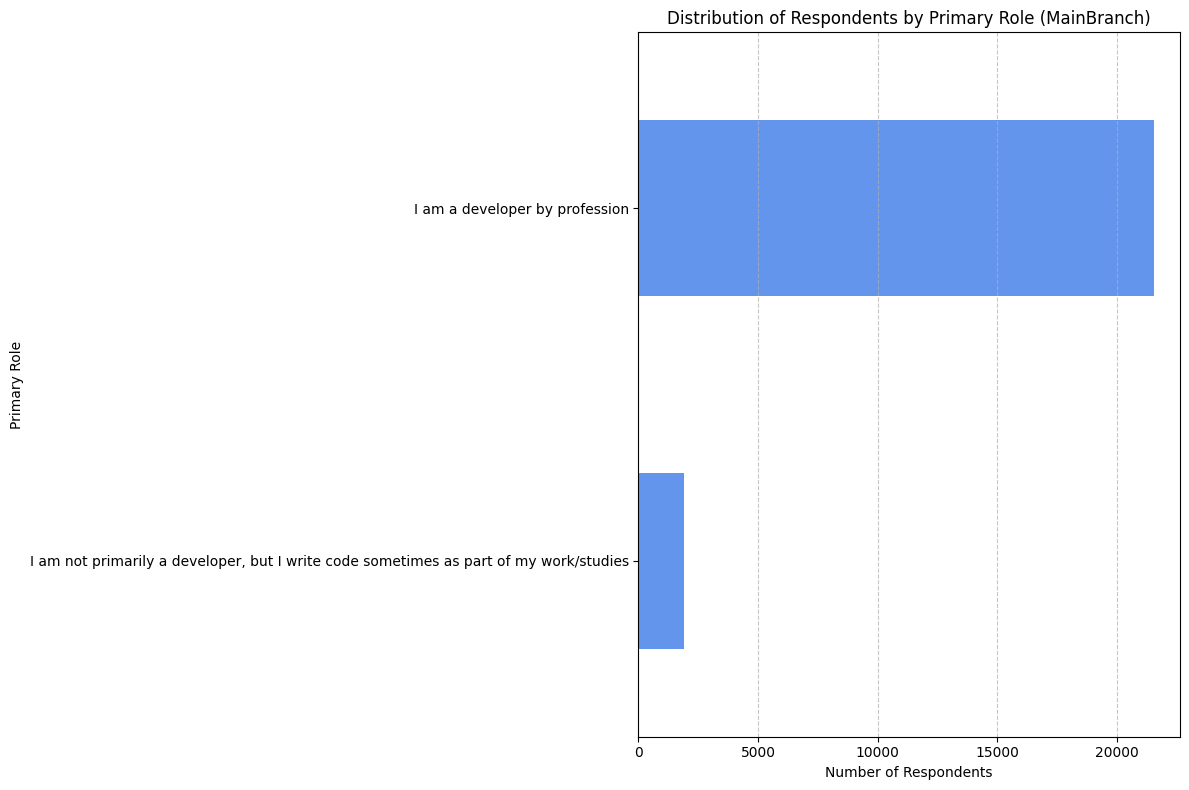

In [8]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Clean the 'MainBranch' column: fill missing or empty strings with 'Unknown'
df['MainBranch'] = df['MainBranch'].fillna('Unknown').replace('', 'Unknown')

# Check the value counts for MainBranch
role_counts = df['MainBranch'].value_counts()

# Print the value counts 
print(role_counts)

# Plot the horizontal bar chart
plt.figure(figsize=(12, 8))
role_counts.sort_values().plot(kind='barh', color='cornflowerblue')

plt.title('Distribution of Respondents by Primary Role (MainBranch)')
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



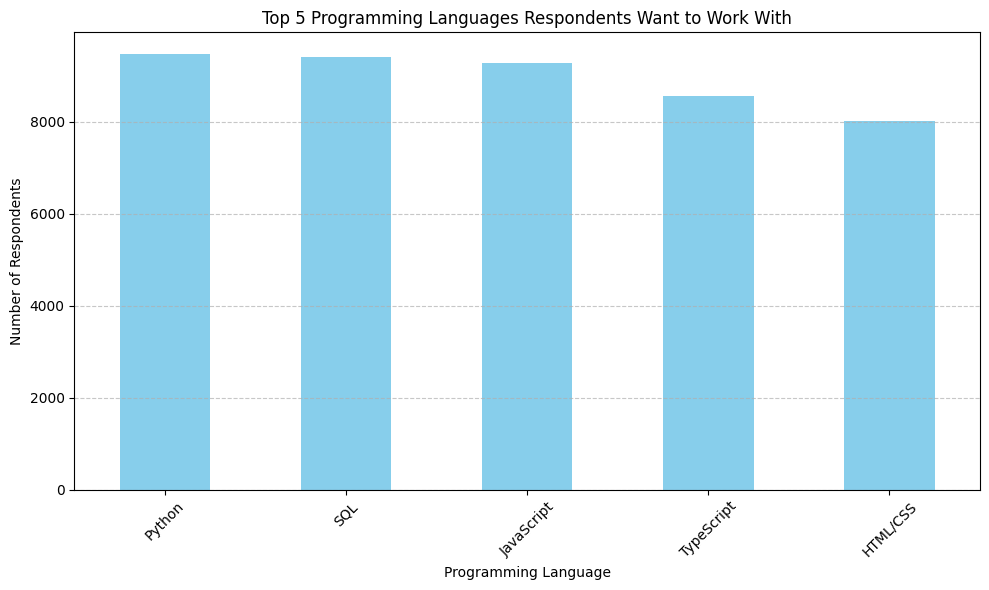

In [9]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Drop missing or empty responses
lang_series = df['LanguageWantToWorkWith'].dropna()
lang_series = lang_series[lang_series.str.strip() != '']

# Split multiple languages per respondent into a flat list
all_langs = lang_series.str.split(';').explode().str.strip()

# Count frequency of each language
lang_counts = all_langs.value_counts()

# Get top 5 languages
top5_langs = lang_counts.head(5)

# Plot vertical bar chart
plt.figure(figsize=(10, 6))
top5_langs.plot(kind='bar', color='skyblue')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


/tmp/ipykernel_4435/2285853825.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_clean.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()


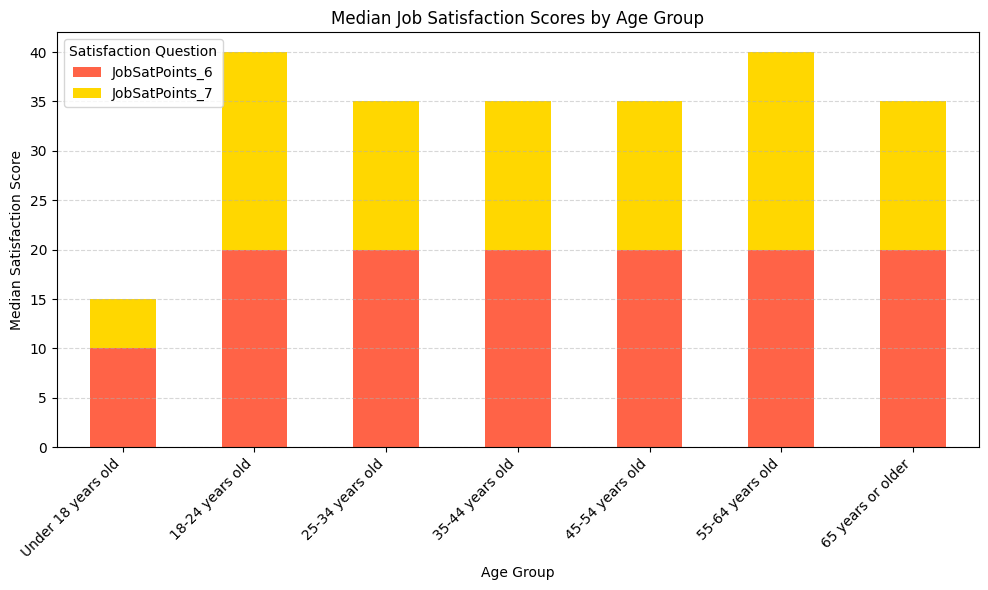

In [10]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Ensure Age column has meaningful categories
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

# Clean age column 
df = df[df['Age'].isin(age_order)]

# Convert Age to ordered categorical for consistent plotting
df['AgeGroup'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Drop missing values in satisfaction columns
df_clean = df.dropna(subset=['JobSatPoints_6', 'JobSatPoints_7'])

# Group by age group and calculate median
grouped = df_clean.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plot
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['tomato', 'gold'])
plt.title('Median Job Satisfaction Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Satisfaction Question')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



/tmp/ipykernel_4435/2728568893.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_db['DatabaseHaveWorkedWith'] = df_db['DatabaseHaveWorkedWith'].str.split(';')


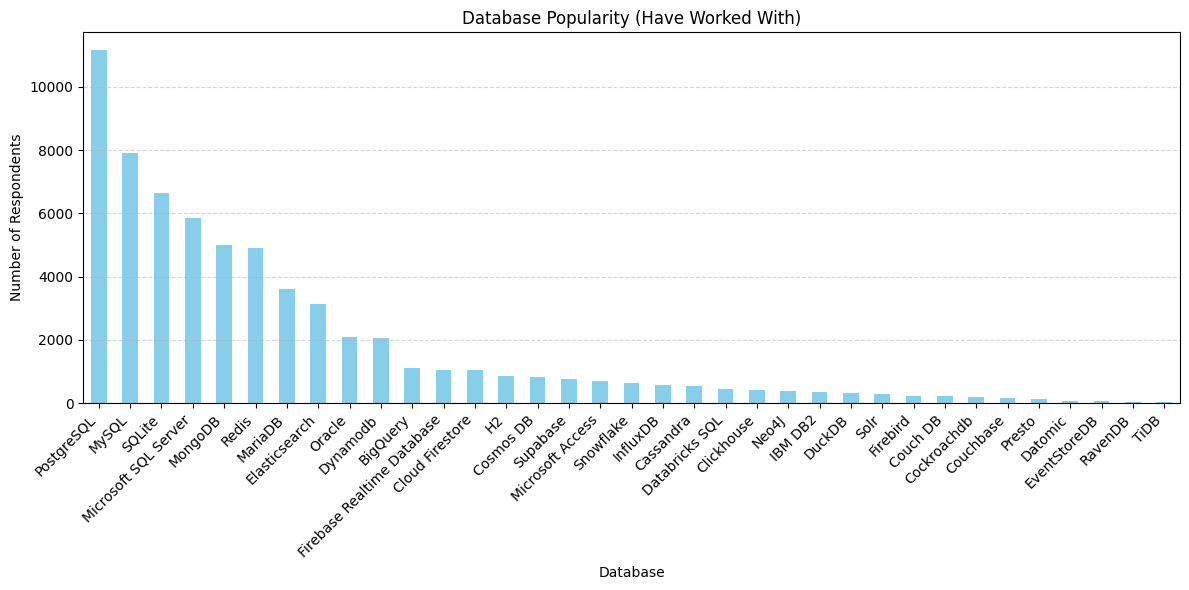

In [11]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Drop missing values in the relevant column
df_db = df.dropna(subset=['DatabaseHaveWorkedWith'])

# Split the semicolon-separated values into lists
df_db['DatabaseHaveWorkedWith'] = df_db['DatabaseHaveWorkedWith'].str.split(';')

# Explode the lists into individual rows
exploded_db = df_db.explode('DatabaseHaveWorkedWith')

# Count the occurrences of each database
db_counts = exploded_db['DatabaseHaveWorkedWith'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
db_counts.plot(kind='bar', color='skyblue')
plt.title('Database Popularity (Have Worked With)')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_4435/1301920304.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_clean.groupby('AgeGroup')['ConvertedCompYearly'].median().dropna()


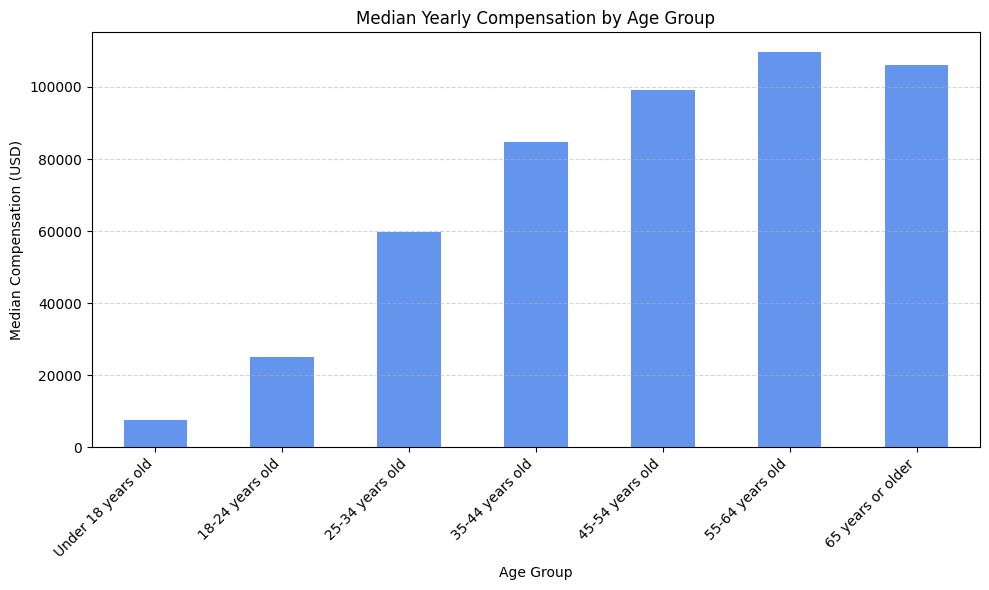

In [12]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Define consistent age group order
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

# Ensure compensation is numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Drop rows with missing age or compensation
df_clean = df.dropna(subset=['Age', 'ConvertedCompYearly'])

# Convert age to categorical with specified order
df_clean['AgeGroup'] = pd.Categorical(df_clean['Age'], categories=age_order, ordered=True)

# Group by AgeGroup and calculate median compensation
grouped = df_clean.groupby('AgeGroup')['ConvertedCompYearly'].median().dropna()

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color='cornflowerblue')
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



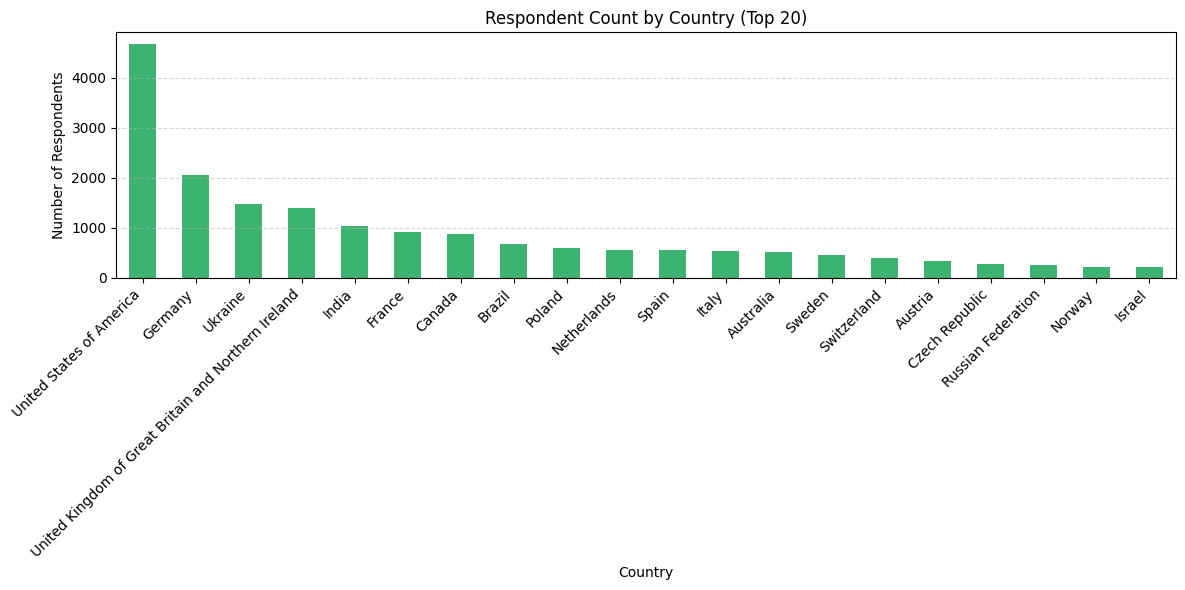

In [13]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Count the number of respondents per country
country_counts = df['Country'].value_counts().sort_values(ascending=False)

# Display top 20 countries for clarity
top_countries = country_counts.head(20)

# Plot
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='mediumseagreen')

plt.title('Respondent Count by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
